## Creating a Spring-Mass-Damper System Model
A multi-mass system model simulates the behavior of multiple masses interconnected by springs. This type of model is commonly used in physics to understand the dynamics of mechanical systems. In this model, each mass is represented as a node, and the connections between masses are represented by edges, which correspond to the springs.

Multi-Mass System Model in Working:

1. Define the System Parameters:

    - Masses (m1, m2, m3)
    - Spring Constants (k1, k2)
    

2. Create a Multi-Mass System Graph:

    - Initialize the Model and Graph
    - Define nodes for each mass
    - Define edges representing the springs between masses
    

3. Generate a Graph Image:

      - Visualize the model graph using graphviz
      

4. Plot Displacements Over Time:

      - Define displacement functions for each mass
      - Plot the displacements of each mass over time
      

4. Plot Velocities Over Time:

      - Calculate velocities for each mass
      - Plot the velocities of each mass over time
      

5. Plot Accelerations Over Time:

      - Calculate accelerations for each mass
      - Plot the accelerations of each mass over time
      
      
6. Plot Kinetic ,Potential and Total Energy Over Time:

      - Calculate Kinetic,potential and total energy.
      - Plot it Over Time
      

22. Save the Model:

     - Save the model to files in JSON and YAML formats



## Import necessary packages

In [28]:
from modeci_mdf.mdf import *
import numpy as np
import matplotlib.pyplot as plt

## Creating a Model

In [29]:
# Initialize the Model
multi_mass_model = Model(id="MultiMass_Model")

# Create a Graph within the Model
multi_mass_graph = Graph(id="MultiMass_Graph")
multi_mass_model.graphs.append(multi_mass_graph)

# Define system parameters

In [30]:
m1 = 1.0  # mass of the first object (kg)
m2 = 2.0  # mass of the second object (kg)
m3 = 1.5  # mass of the third object (kg)
k1 = 10.0  # spring constant for the first spring (N/m)
k2 = 15.0  # spring constant for the second spring (N/m)

# Parameters for the masses and springs

In [31]:
mass1_param = Parameter(id="mass1", value=m1)
mass2_param = Parameter(id="mass2", value=m2)
mass3_param = Parameter(id="mass3", value=m3)
spring1_param = Parameter(id="spring1", value=k1)
spring2_param = Parameter(id="spring2", value=k2)

# Node for the first mass

In [32]:
mass1_node = Node(id="Mass1_Node")


# Adding parameters to the first mass node

In [33]:
mass1_node.parameters.append(mass1_param)

# Output port for the first mass node

In [34]:
mass1_output_port = OutputPort(id="mass1_output_port", value="mass1")
mass1_node.output_ports.append(mass1_output_port)

# Node for the second mass

In [35]:
mass2_node = Node(id="Mass2_Node")

# Adding parameters to the second mass node

In [36]:
mass2_node.parameters.append(mass2_param)

# Output port for the second mass node

In [37]:
mass2_output_port = OutputPort(id="mass2_output_port", value="mass2")
mass2_node.output_ports.append(mass2_output_port)

# Node for the third mass

In [38]:
mass3_node = Node(id="Mass3_Node")

# Adding parameters to the third mass node

In [39]:
mass3_node.parameters.append(mass3_param)

# Output port for the third mass node

In [40]:
mass3_output_port = OutputPort(id="mass3_output_port", value="mass3")
mass3_node.output_ports.append(mass3_output_port)

# Add nodes to the graph

In [41]:
multi_mass_graph.nodes.extend([mass1_node, mass2_node, mass3_node])

# Define edges representing the springs between masses

In [42]:
spring1_edge = Edge(id="spring1_edge", sender=mass1_node.id, receiver=mass2_node.id, sender_port="mass1_output_port", receiver_port="mass2_output_port")
spring2_edge = Edge(id="spring2_edge", sender=mass2_node.id, receiver=mass3_node.id, sender_port="mass2_output_port", receiver_port="mass3_output_port")

# Add edges to the graph

In [43]:
multi_mass_graph.edges.extend([spring1_edge, spring2_edge])

# Generate a graph image

Converting MDF graph: MultiMass_Graph to graphviz (level: 2, format: png)
    Node: Mass1_Node
    Node: Mass2_Node
    Node: Mass3_Node
    Edge: spring1_edge connects Mass1_Node to Mass2_Node
    Edge: spring2_edge connects Mass2_Node to Mass3_Node
Written graph image to: SpringMassSystem.png


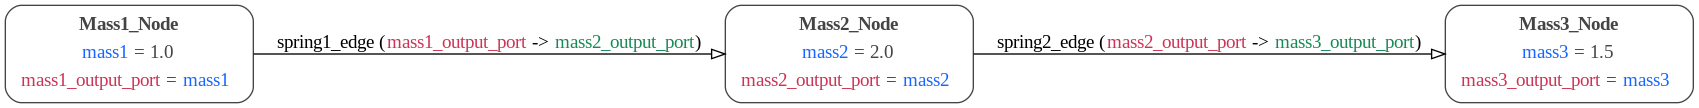

In [44]:
from IPython.display import Image


graph_image_file = "SpringMassSystem.png"
multi_mass_model.to_graph_image(engine="dot", output_format="png", filename_root="SpringMassSystem", is_horizontal=True)

# Display the generated graph image
Image(filename=graph_image_file)

# Define time array

In [45]:
t = np.linspace(0, 10, 100)

# Define displacement functions 

In [46]:
displacement1 = np.sin(2 * np.pi * t)  # Unique expression for mass 1
displacement2 = np.cos(2 * np.pi * t)  # Unique expression for mass 2
displacement3 = np.sin(2 * np.pi * t + np.pi/4)  # Unique expression for mass 3

# Plotting the displacements over time

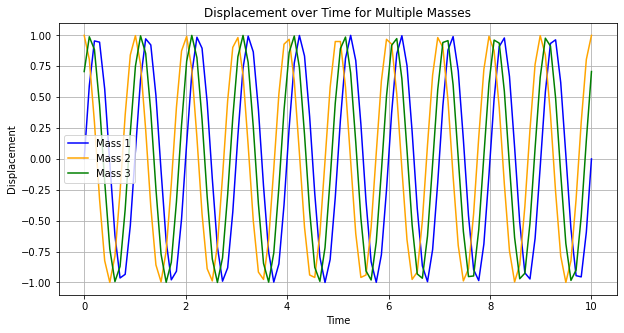

In [47]:

plt.figure(figsize=(10, 5))
plt.plot(t, displacement1, label='Mass 1', color='blue')
plt.plot(t, displacement2, label='Mass 2', color='orange')
plt.plot(t, displacement3, label='Mass 3', color='green')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Displacement over Time for Multiple Masses')
plt.legend()
plt.grid(True)
plt.show()

# Define velocity functions for each mass

In [48]:
velocity1 = np.gradient(displacement1, t)  # First derivative of displacement for mass 1
velocity2 = np.gradient(displacement2, t)  # First derivative of displacement for mass 2
velocity3 = np.gradient(displacement3, t)  # First derivative of displacement for mass 3

# Define acceleration functions for each mass

In [49]:

acceleration1 = np.gradient(velocity1, t)  # Second derivative of displacement for mass 1
acceleration2 = np.gradient(velocity2, t)  # Second derivative of displacement for mass 2
acceleration3 = np.gradient(velocity3, t)  # Second derivative of displacement for mass 3

# Plotting the velocities over time

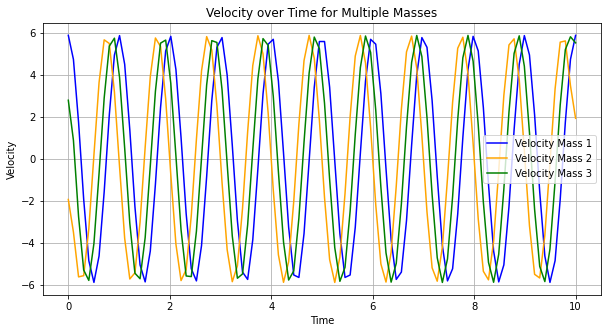

In [50]:

plt.figure(figsize=(10, 5))
plt.plot(t, velocity1, label='Velocity Mass 1', color='blue')
plt.plot(t, velocity2, label='Velocity Mass 2', color='orange')
plt.plot(t, velocity3, label='Velocity Mass 3', color='green')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity over Time for Multiple Masses')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the accelerations over time

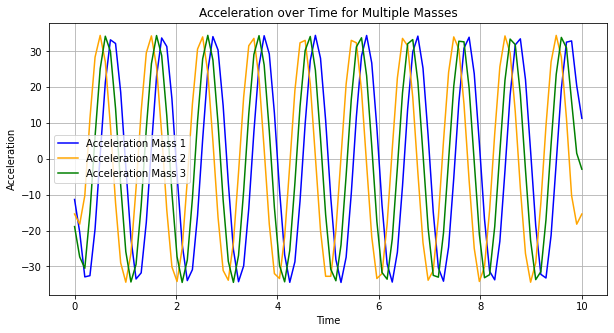

In [51]:

plt.figure(figsize=(10, 5))
plt.plot(t, acceleration1, label='Acceleration Mass 1', color='blue')
plt.plot(t, acceleration2, label='Acceleration Mass 2', color='orange')
plt.plot(t, acceleration3, label='Acceleration Mass 3', color='green')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration over Time for Multiple Masses')
plt.legend()
plt.grid(True)
plt.show()

# Calculate kinetic ,potential and total energy for each mass

In [59]:
#Calculate kinetic energy for each mass
ke1 = 0.5 * m1 * velocity1 ** 2
ke2 = 0.5 * m2 * velocity2 ** 2
ke3 = 0.5 * m3 * velocity3 ** 2

# Calculate potential energy for each spring
pe1 = 0.5 * k1 * displacement1 ** 2
pe2 = 0.5 * k2 * displacement2 ** 2
pe_total = pe1 + pe2  # Total potential energy of the system

# Calculate total energy of the system
te = ke1 + ke2 + ke3 + pe_total



 # Plotting the kinetic energy ,potential energy and total energy  over time

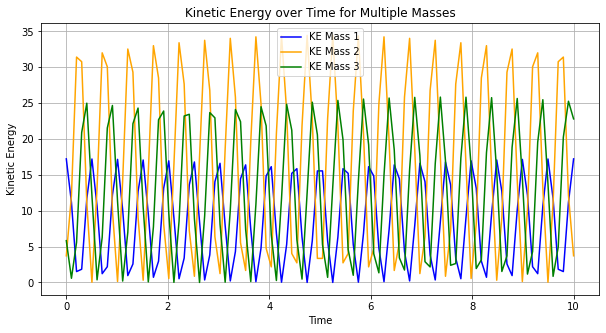

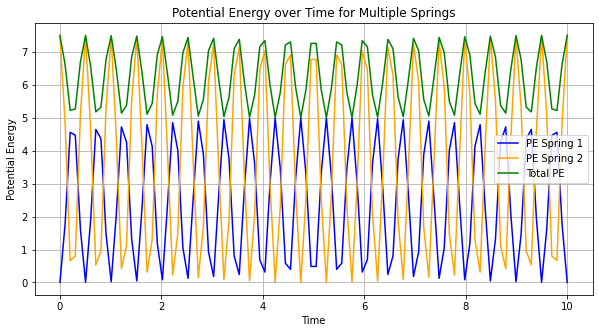

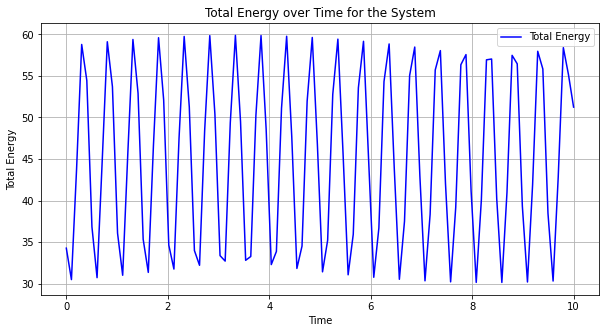

In [60]:

# Plotting the kinetic energy over time

plt.figure(figsize=(10, 5))
plt.plot(t, ke1, label='KE Mass 1', color='blue')
plt.plot(t, ke2, label='KE Mass 2', color='orange')
plt.plot(t, ke3, label='KE Mass 3', color='green')
plt.xlabel('Time')
plt.ylabel('Kinetic Energy')
plt.title('Kinetic Energy over Time for Multiple Masses')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the potential energy over time

plt.figure(figsize=(10, 5))
plt.plot(t, pe1, label='PE Spring 1', color='blue')
plt.plot(t, pe2, label='PE Spring 2', color='orange')
plt.plot(t, pe_total, label='Total PE', color='green')
plt.xlabel('Time')
plt.ylabel('Potential Energy')
plt.title('Potential Energy over Time for Multiple Springs')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the total energy over time

plt.figure(figsize=(10, 5))
plt.plot(t, te, label='Total Energy', color='blue')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.title('Total Energy over Time for the System')
plt.legend()
plt.grid(True)
plt.show()

# Save the model to files in JSON and YAML formats

In [61]:

j_file = "%s.json" % multi_mass_model.id
multi_mass_model.to_json_file(j_file)
print("Saved to %s" % j_file)

y_file = "%s.yaml" % multi_mass_model.id
multi_mass_model.to_yaml_file(y_file)
print("Saved to %s" % y_file)

Saved to MultiMass_Model.json
Saved to MultiMass_Model.yaml
